In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [93]:

df = pd.read_csv('star_type_.csv')

In [94]:
# Explore the basic information about the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 9.5+ KB


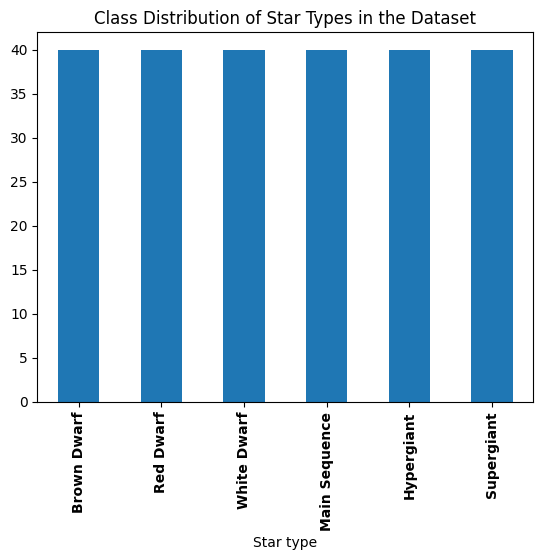

In [95]:
# Plot unique classes in Star type column
df['Star type'].value_counts().plot(kind='bar')
plt.xticks(weight='bold')
plt.title('Class Distribution of Star Types in the Dataset')
plt.savefig('ClassDistribution.png')
plt.show()

In [96]:
# First prepare X (input features dataframe) and y (target data series)
X = df.drop(['Star type'], axis=1) # axis = 0 is for row and axis = 1 is for col in 2D data
y = df['Star type'] # this is data series for targets in the orignal df

In [97]:
# Cross check the shapes
print(f'The shape of input features:- {X.shape}')
print(f'The shape of targets:- {y.shape}')

The shape of input features:- (240, 4)
The shape of targets:- (240,)


In [98]:
# Split original data into train-val set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,                 # input features (array-like)
                                                  y,                 # target data (array-like)
                                                  test_size=0.2,     # validation split size in percentage
                                                  shuffle=True,      # Shuffle the dataset
                                                  random_state=42)   # Always shuffle in the same pattern


In [99]:
# Check the shapes of X_train, y_train, X_val, and y_val
print(f'Shape of X_train:- {X_train.shape}')
print(f'Shape of y_train:- {y_train.shape}')
print()
print(f'Shape of X_val:- {X_val.shape}')
print(f'Shape of y_val:- {y_val.shape}')

Shape of X_train:- (192, 4)
Shape of y_train:- (192,)

Shape of X_val:- (48, 4)
Shape of y_val:- (48,)


In [100]:
# Imports top create pipeline for scaling and classifier steps
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [101]:
# Pipeline is used to store the steps to be implemented on the dataset

# Create list of steps where each element is a tuple (name_of_step, init of that step)
steps = [
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(penalty='l2',
                                      tol=1e-13,
                                      random_state=42,
                                      solver='sag',
                                      max_iter=5000))
]

pipeline = Pipeline(steps)

In [102]:
pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(max_iter=5000, random_state=42,
                                    solver='sag', tol=1e-13))])

In [103]:
# Fit the pipeline
pipeline.fit(X_train, y_train) # remember to pass only training data

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(max_iter=5000, random_state=42,
                                    solver='sag', tol=1e-13))])

In [104]:
# Check the mean and variance (std square is variance) values in the scaler
pipeline['scaler'].mean_
pipeline['scaler'].var_

array([8.71165318e+07, 2.82611058e+10, 2.43158486e+05, 1.07985733e+02])

In [105]:
# Check the weights and bias for logistic regression
pipeline['classifier'].coef_
pipeline['classifier'].intercept_

array([-3.01460666,  0.9049343 ,  1.11128809,  0.24861336,  0.37315862,
        0.37661228])

In [106]:
# Predict on training data
y_pred_train = pipeline.predict(X_train)

# Predict on validation data
y_pred_val = pipeline.predict(X_val)

# Calculate training accuracy
accuracy_train_standard = accuracy_score(y_train, y_pred_train)

# Calculate validation accuracy
accuracy_val_standard = accuracy_score(y_val, y_pred_val)

# Print the results
print(f"Training Accuracy with StandardScaler: {accuracy_train_standard:.2f}")
print(f"Validation Accuracy with StandardScaler: {accuracy_val_standard:.2f}")

# Check for overfitting in the model
if accuracy_val_standard < accuracy_train_standard - 0.02:  # Adjust condition to focus on the gap
    overfitting_seen_standard = "Yes"
else:
    overfitting_seen_standard = "No"

# Print the result
print("Overfitting seen (no scaler):", overfitting_seen_standard)

Training Accuracy with StandardScaler: 0.96
Validation Accuracy with StandardScaler: 0.96
Overfitting seen (no scaler): No


# Testing on unseen data

In [107]:
df.columns

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type'],
      dtype='object')

In [108]:
pipeline['classifier'].classes_

array(['Brown Dwarf', 'Hypergiant', 'Main Sequence', 'Red Dwarf',
       'Supergiant', 'White Dwarf'], dtype=object)

# Download the fitted pipeline

In [109]:
pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(max_iter=5000, random_state=42,
                                    solver='sag', tol=1e-13))])

In [110]:
from joblib import dump

dump(pipeline , 'pipeline_for_startypepredictor.joblib')

['pipeline_for_startypepredictor.joblib']

In [111]:
from joblib import load

pipeline_test = load('pipeline_for_startypepredictor.joblib')
pipeline_test['scaler']

StandardScaler()

In [112]:
pipeline_test['classifier'].intercept_

array([-3.01460666,  0.9049343 ,  1.11128809,  0.24861336,  0.37315862,
        0.37661228])

# Applying MinMax Scaler


In [113]:
# First prepare X (input features dataframe) and y (target data series)
X = df.drop(['Star type'], axis=1) # axis = 0 is for row and axis = 1 is for col in 2D data
y = df['Star type'] # this is data series for targets in the orignal df

In [114]:
# Split original data into train-val set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,                 # input features (array-like)
                                                  y,                 # target data (array-like)
                                                  test_size=0.2,     # validation split size in percentage
                                                  shuffle=True,      # Shuffle the dataset
                                                  random_state=42)   # Always shuffle in the same pattern

In [115]:
# Imports top create pipeline for scaling and classifier steps
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [116]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define steps with MinMaxScaler and LogisticRegression
steps = [
    ('scaler', MinMaxScaler()),  # Use MinMaxScaler
    ('classifier', LogisticRegression(
        penalty='l2',
        tol=1e-13,
        random_state=42,
        solver='sag',
        max_iter=5000
    ))
]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on training data
y_pred_train = pipeline.predict(X_train)

# Predict on validation data
y_pred_val = pipeline.predict(X_val)

# Calculate training accuracy
accuracy_train_minmax = accuracy_score(y_train, y_pred_train)

# Calculate validation accuracy
accuracy_val_minmax = accuracy_score(y_val, y_pred_val)

# Print the results
print(f"Training Accuracy with MinMaxScaler: {accuracy_train_minmax:.2f}")
print(f"Validation Accuracy with MinMaxScaler: {accuracy_val_minmax:.2f}")

# Check for overfitting in the model
if accuracy_val_minmax < accuracy_train_minmax - 0.02:  # Adjust condition to focus on the gap
    overfitting_seen_minmax = "Yes"
else:
    overfitting_seen_minmax = "No"

# Print the result
print("Overfitting seen (no scaler):", overfitting_seen_minmax)


Training Accuracy with MinMaxScaler: 0.91
Validation Accuracy with MinMaxScaler: 0.88
Overfitting seen (no scaler): Yes


# No Scaler

In [117]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define steps without any scaler, only Logistic Regression
steps = [
    ('classifier', LogisticRegression(
        penalty='l2',
        tol=1e-13,
        random_state=42,
        solver='sag',
        max_iter=5000
    ))
]

# Create the pipeline
pipeline_no_scaler = Pipeline(steps)

# Fit the pipeline to the training data
pipeline_no_scaler.fit(X_train, y_train)

# Predict on training data
y_pred_train_no_scaler = pipeline_no_scaler.predict(X_train)

# Predict on validation data
y_pred_val_no_scaler = pipeline_no_scaler.predict(X_val)

# Calculate training accuracy
accuracy_train_no_scaler = accuracy_score(y_train, y_pred_train_no_scaler)

# Calculate validation accuracy
accuracy_val_no_scaler = accuracy_score(y_val, y_pred_val_no_scaler)

# Print the results
print(f"Training Accuracy without Scaler: {accuracy_train_no_scaler:.2f}")
print(f"Validation Accuracy without Scaler: {accuracy_val_no_scaler:.2f}")
# Check for overfitting in the model without scaling
if accuracy_val_no_scaler < accuracy_train_no_scaler - 0.02:
    overfitting_seen_no_scaler = "Yes"
else:
    overfitting_seen_no_scaler = "No"

# Print the result
print("Overfitting seen (no scaler):", overfitting_seen_no_scaler)


Training Accuracy without Scaler: 0.52
Validation Accuracy without Scaler: 0.52
Overfitting seen (no scaler): No


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# After Hypertuning

In [118]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the pipeline with compatible hyperparameters
steps = [
    ('classifier', LogisticRegression(
        random_state=42,
        class_weight=None,
        dual=False,
        fit_intercept=True,
        intercept_scaling=1,
        l1_ratio=None,  # Used only for 'elasticnet' penalty
        max_iter=1000,
        multi_class='auto',
        n_jobs=None,
        penalty='l1',  # L1 regularization
        solver='liblinear',  # Compatible solver for L1
        tol=0.0001,
        verbose=0,
        warm_start=False
    ))
]

# Create the pipeline
pipeline_tuned = Pipeline(steps)

# Fit the pipeline to the training data
pipeline_tuned.fit(X_train, y_train)

# Predict on training data
y_pred_train_tuned = pipeline_tuned.predict(X_train)

# Predict on validation data
y_pred_val_tuned = pipeline_tuned.predict(X_val)

# Calculate training accuracy
accuracy_train_tuned = accuracy_score(y_train, y_pred_train_tuned)

# Calculate validation accuracy
accuracy_val_tuned = accuracy_score(y_val, y_pred_val_tuned)

# Print the results
print(f"Training Accuracy with Tuned Parameters: {accuracy_train_tuned:.2f}")
print(f"Validation Accuracy with Tuned Parameters: {accuracy_val_tuned:.2f}")

# Check for overfitting
if accuracy_val_tuned < accuracy_train_tuned - 0.02:  # Focus on overfitting gap
    overfitting_seen_tuned = "Yes"
else:
    overfitting_seen_tuned = "No"

print("Overfitting seen:", overfitting_seen_tuned)


Training Accuracy with Tuned Parameters: 0.98
Validation Accuracy with Tuned Parameters: 0.98
Overfitting seen: No


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# Table for Comparison

In [119]:
import pandas as pd

results = {
    "Category": ["Standard Scaler", "MinMax Scaler", "No Scaler", "Hypertuning"],
    "Training Accuracy": [
        accuracy_train_standard,
        accuracy_train_minmax,
        accuracy_train_no_scaler,
        accuracy_train_tuned
    ],
    "Validation Accuracy": [
        accuracy_val_standard,
        accuracy_val_minmax,
        accuracy_val_no_scaler,
        accuracy_val_tuned
    ],
    "Overfitting Seen": [
        overfitting_seen_standard,
        overfitting_seen_minmax,
        overfitting_seen_no_scaler,
        overfitting_seen_tuned
    ]
}

results_df = pd.DataFrame(results)

print(results_df)


          Category  Training Accuracy  Validation Accuracy Overfitting Seen
0  Standard Scaler           0.958333             0.958333               No
1    MinMax Scaler           0.906250             0.875000              Yes
2        No Scaler           0.515625             0.520833               No
3      Hypertuning           0.984375             0.979167               No
